In [3]:
import numpy as np
import keras
from keras.applications.imagenet_utils import decode_predictions
import skimage.io
import skimage.segmentation
import copy
import sklearn
import sklearn.metrics
from sklearn.linear_model import LinearRegression
import warnings

print('Notebook running: keras ', keras.__version__)
np.random.seed(222)

Notebook running: keras  3.3.2


In [4]:
warnings.filterwarnings('ignore')
inceptionV3_model = keras.applications.inception_v3.InceptionV3() #Load pretrained model

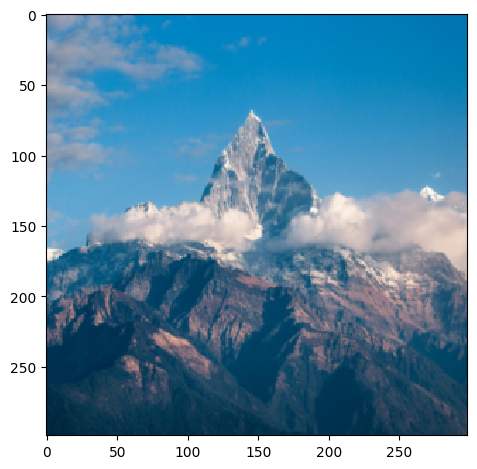

In [5]:
Xi = skimage.io.imread(r"C:\Users\SESA737860\Downloads\pexels-pixabay-417173.jpg")
Xi = skimage.transform.resize(Xi, (299,299))
Xi = (Xi - 0.5)*2 #Inception pre-processing
skimage.io.imshow(Xi/2+0.5) # Show image before inception preprocessing

In [6]:
Xi.shape

(299, 299, 3)

In [5]:
np.random.seed(222)
preds = inceptionV3_model.predict(Xi[np.newaxis,:,:,:])
decode_predictions(preds)[0] #Top 5 classes

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


[('n09193705', 'alp', 0.8677829),
 ('n09472597', 'volcano', 0.0119814165),
 ('n09468604', 'valley', 0.0026488695),
 ('n04592741', 'wing', 0.001959018),
 ('n02883205', 'bow_tie', 0.0014271893)]

In [6]:
top_pred_classes = preds[0].argsort()[-5:][::-1]
top_pred_classes                #Index of top 5 classes

array([970, 980, 979, 908, 457], dtype=int64)

In [7]:
superpixels = skimage.segmentation.quickshift(Xi, kernel_size=4,max_dist=200, ratio=0.2)
num_superpixels = np.unique(superpixels).shape[0]
num_superpixels

64

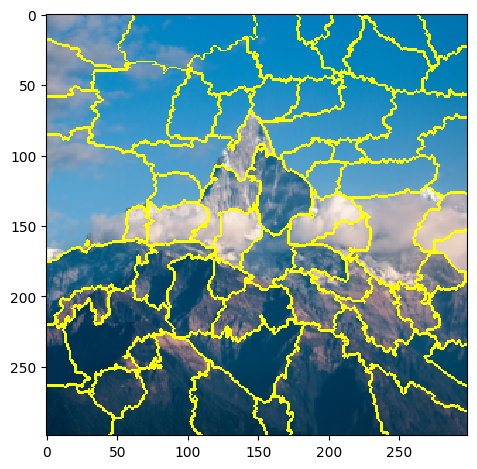

In [8]:
skimage.io.imshow(skimage.segmentation.mark_boundaries(Xi/2+0.5, superpixels))

In [9]:
num_perturb = 150
perturbations = np.random.binomial(1, 0.5, size=(num_perturb, num_superpixels))
perturbations[0] #Show example of perturbation

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0])

In [11]:
def perturb_image(img,perturbation,segments):
  active_pixels = np.where(perturbation == 1)[0]
  mask = np.zeros(segments.shape)
  for active in active_pixels:
      mask[segments == active] = 1
  perturbed_image = copy.deepcopy(img)
  perturbed_image = perturbed_image*mask[:,:,np.newaxis]
  return perturbed_image

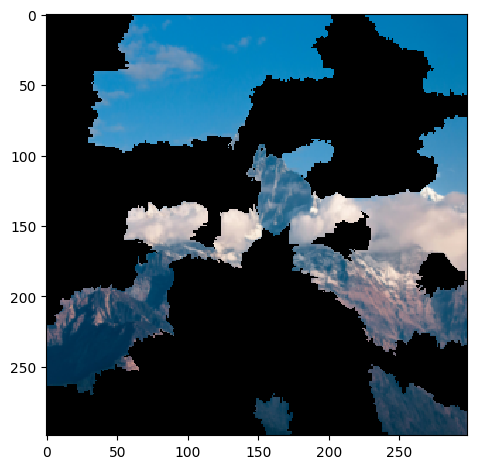

In [12]:
skimage.io.imshow(perturb_image(Xi/2+0.5,perturbations[0],superpixels))

In [13]:
predictions = []
for pert in perturbations:
  perturbed_img = perturb_image(Xi,pert,superpixels)
  pred = inceptionV3_model.predict(perturbed_img[np.newaxis,:,:,:])
  predictions.append(pred)

predictions = np.array(predictions)
predictions.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/

(150, 1, 1000)

In [14]:
original_image = np.ones(num_superpixels)[np.newaxis,:] #Perturbation with all superpixels enabled
distances = sklearn.metrics.pairwise_distances(perturbations,original_image, metric='cosine').ravel()
distances.shape

(150,)

In [15]:
kernel_width = 0.25
weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2)) #Kernel function
weights.shape

(150,)

In [16]:
class_to_explain = top_pred_classes[0]
simpler_model = LinearRegression()
simpler_model.fit(X=perturbations, y=predictions[:,:,class_to_explain], sample_weight=weights)
coeff = simpler_model.coef_[0]
coeff

array([ 1.88971543e-02, -4.89957126e-03, -4.42436320e-02, -2.88620977e-02,
        6.20160340e-02,  2.03705153e-02,  5.14297539e-02,  2.86297345e-02,
        1.19557280e-04,  5.02371915e-02,  1.05552977e-01,  3.81728782e-02,
       -1.09400072e-02, -8.53566126e-03,  1.62603487e-02,  2.67502102e-02,
        1.45717381e-02,  5.30448588e-02,  3.32289806e-03,  9.31509023e-03,
       -2.95239116e-02,  2.70192882e-03,  2.35875277e-01,  1.37499380e-02,
       -9.42987994e-03, -6.09336964e-03,  6.00448574e-02,  7.06952043e-02,
        1.89519189e-02,  1.01898692e-01,  6.78695836e-03,  7.14454478e-03,
       -6.36073501e-02,  1.59833813e-01,  4.27136287e-02,  3.27464730e-02,
        8.93222153e-02,  5.03987721e-02, -2.14003294e-02,  1.27555661e-01,
        2.78990974e-02,  6.55136084e-02, -1.66162541e-02,  2.75746834e-02,
        1.99128193e-02,  3.17759472e-02,  6.18592793e-02, -7.67389872e-02,
        2.96532836e-02,  5.68554839e-03,  5.73583658e-02, -4.14221811e-02,
       -2.45423136e-02,  

In [17]:
num_top_features = 4
top_features = np.argsort(coeff)[-num_top_features:]
top_features

array([39, 33, 53, 22], dtype=int64)

In [ ]:
# array([27, 30, 33, 21], dtype=int64)

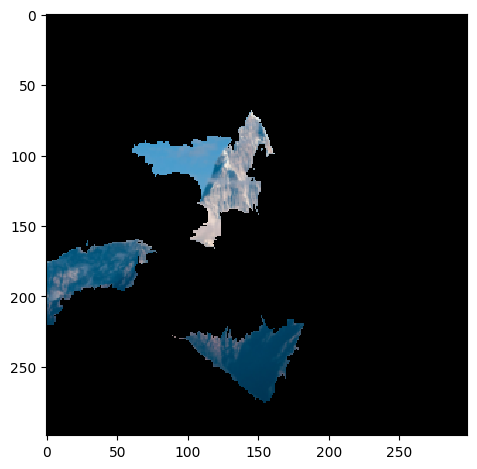

In [18]:
mask = np.zeros(num_superpixels)
mask[top_features]= True #Activate top superpixels
skimage.io.imshow(perturb_image(Xi/2+0.5,mask,superpixels) )

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


  1%|          | 10/1000 [00:00<00:49, 19.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


  2%|▏         | 20/1000 [00:01<00:59, 16.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


  3%|▎         | 30/1000 [00:01<01:00, 16.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


  4%|▍         | 40/1000 [00:02<00:55, 17.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


  5%|▌         | 50/1000 [00:02<00:51, 18.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


  6%|▌         | 60/1000 [00:03<00:49, 19.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


  7%|▋         | 70/1000 [00:03<00:48, 19.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


  8%|▊         | 80/1000 [00:04<00:48, 19.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


  9%|▉         | 90/1000 [00:04<00:47, 19.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 10%|█         | 100/1000 [00:05<00:44, 20.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 11%|█         | 110/1000 [00:05<00:43, 20.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 12%|█▏        | 120/1000 [00:06<00:43, 20.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 13%|█▎        | 130/1000 [00:06<00:42, 20.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 14%|█▍        | 140/1000 [00:07<00:43, 19.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 15%|█▌        | 150/1000 [00:07<00:42, 20.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 16%|█▌        | 160/1000 [00:08<00:41, 20.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 17%|█▋        | 170/1000 [00:08<00:41, 19.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 18%|█▊        | 180/1000 [00:09<00:41, 19.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 19%|█▉        | 190/1000 [00:09<00:42, 19.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 20%|██        | 200/1000 [00:10<00:42, 19.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 21%|██        | 210/1000 [00:10<00:41, 19.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 22%|██▏       | 220/1000 [00:11<00:40, 19.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 23%|██▎       | 230/1000 [00:11<00:40, 19.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 24%|██▍       | 240/1000 [00:12<00:41, 18.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 25%|██▌       | 250/1000 [00:13<00:40, 18.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 26%|██▌       | 260/1000 [00:13<00:39, 18.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 27%|██▋       | 270/1000 [00:14<00:38, 18.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 28%|██▊       | 280/1000 [00:14<00:38, 18.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 29%|██▉       | 290/1000 [00:15<00:37, 18.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 30%|███       | 300/1000 [00:15<00:38, 18.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 31%|███       | 310/1000 [00:16<00:37, 18.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 32%|███▏      | 320/1000 [00:16<00:35, 18.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 33%|███▎      | 330/1000 [00:17<00:36, 18.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


 34%|███▍      | 340/1000 [00:17<00:37, 17.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 35%|███▌      | 350/1000 [00:18<00:38, 16.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 36%|███▌      | 360/1000 [00:19<00:38, 16.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 37%|███▋      | 370/1000 [00:19<00:36, 17.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


 38%|███▊      | 380/1000 [00:20<00:37, 16.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 39%|███▉      | 390/1000 [00:21<00:35, 17.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 40%|████      | 400/1000 [00:21<00:34, 17.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 41%|████      | 410/1000 [00:22<00:34, 17.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 42%|████▏     | 420/1000 [00:22<00:33, 17.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 43%|████▎     | 430/1000 [00:23<00:31, 18.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 44%|████▍     | 440/1000 [00:23<00:31, 17.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


 45%|████▌     | 450/1000 [00:24<00:32, 16.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 46%|████▌     | 460/1000 [00:25<00:32, 16.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 47%|████▋     | 470/1000 [00:25<00:31, 16.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 48%|████▊     | 480/1000 [00:26<00:30, 16.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 49%|████▉     | 490/1000 [00:26<00:30, 16.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 50%|█████     | 500/1000 [00:27<00:30, 16.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 51%|█████     | 510/1000 [00:28<00:30, 16.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 52%|█████▏    | 520/1000 [00:28<00:29, 16.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 53%|█████▎    | 530/1000 [00:29<00:28, 16.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 54%|█████▍    | 540/1000 [00:29<00:28, 16.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 55%|█████▌    | 550/1000 [00:30<00:27, 16.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 56%|█████▌    | 560/1000 [00:31<00:26, 16.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 57%|█████▋    | 570/1000 [00:31<00:25, 16.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


 58%|█████▊    | 580/1000 [00:32<00:25, 16.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


 59%|█████▉    | 590/1000 [00:33<00:25, 15.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 60%|██████    | 600/1000 [00:33<00:24, 16.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 61%|██████    | 610/1000 [00:34<00:23, 16.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 62%|██████▏   | 620/1000 [00:34<00:22, 16.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 63%|██████▎   | 630/1000 [00:35<00:22, 16.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 64%|██████▍   | 640/1000 [00:36<00:21, 16.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 65%|██████▌   | 650/1000 [00:36<00:21, 16.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 66%|██████▌   | 660/1000 [00:37<00:20, 16.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


 67%|██████▋   | 670/1000 [00:37<00:20, 16.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 68%|██████▊   | 680/1000 [00:38<00:19, 16.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 69%|██████▉   | 690/1000 [00:39<00:19, 16.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 70%|███████   | 700/1000 [00:39<00:18, 16.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 71%|███████   | 710/1000 [00:40<00:17, 16.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


 73%|███████▎  | 728/1000 [00:41<00:13, 20.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 73%|███████▎  | 732/1000 [00:41<00:17, 15.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 74%|███████▍  | 740/1000 [00:42<00:17, 15.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 75%|███████▌  | 750/1000 [00:42<00:15, 15.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 76%|███████▌  | 760/1000 [00:43<00:15, 15.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


 77%|███████▋  | 770/1000 [00:44<00:14, 15.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 78%|███████▊  | 780/1000 [00:44<00:13, 16.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 79%|███████▉  | 790/1000 [00:45<00:12, 16.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 80%|████████  | 800/1000 [00:45<00:12, 16.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


 81%|████████  | 810/1000 [00:46<00:12, 15.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


 82%|████████▏ | 820/1000 [00:47<00:11, 15.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 83%|████████▎ | 830/1000 [00:47<00:10, 15.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 84%|████████▍ | 840/1000 [00:48<00:09, 16.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 85%|████████▌ | 850/1000 [00:48<00:09, 16.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 86%|████████▌ | 860/1000 [00:49<00:08, 16.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 87%|████████▋ | 870/1000 [00:50<00:07, 16.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 88%|████████▊ | 880/1000 [00:50<00:07, 16.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 89%|████████▉ | 890/1000 [00:51<00:06, 16.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


 90%|█████████ | 900/1000 [00:52<00:06, 16.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 91%|█████████ | 910/1000 [00:52<00:05, 15.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 92%|█████████▏| 920/1000 [00:53<00:04, 16.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 93%|█████████▎| 930/1000 [00:53<00:04, 16.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 94%|█████████▍| 940/1000 [00:54<00:03, 16.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 95%|█████████▌| 950/1000 [00:55<00:03, 16.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 96%|█████████▌| 960/1000 [00:55<00:02, 16.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 97%|█████████▋| 970/1000 [00:56<00:01, 16.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 98%|█████████▊| 980/1000 [00:56<00:01, 16.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 99%|█████████▉| 990/1000 [00:57<00:00, 16.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


100%|██████████| 1000/1000 [00:58<00:00, 17.20it/s]


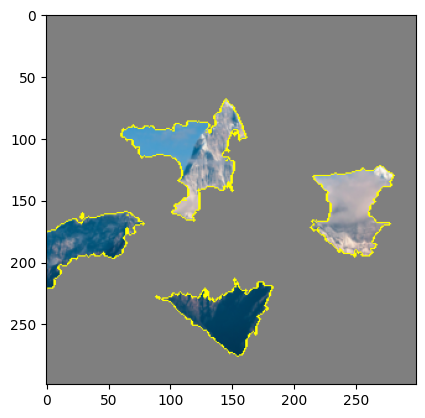

In [39]:
import skimage.io
from lime import lime_image
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries


explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(Xi, inceptionV3_model.predict, top_labels=5, hide_color=0, num_samples=1000)

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()

In [40]:
explanation.top_labels[0]

970